In [2]:
import numpy as np
import scipy.stats as st

In [3]:
# generate random samples from Normal Distribution and sort 
samp_a = np.sort(np.random.normal(loc=0.0, scale=1.0, size=20))
print(samp_a)
print(20*'-')

# generate random samples from LogNormal Distribution and sort 
samp_b = np.sort(np.random.lognormal(mean=0.0, sigma=1.0, size=25))
print(samp_b)
print(20*'-')

# concatenate and sort   
samp_conc = np.sort(np.concatenate((samp_a, samp_b)))
print(samp_conc)
print(28*'-')



[-1.43954509 -1.19699258 -0.94147593 -0.79655054 -0.69362482 -0.64387844
 -0.53141931 -0.34822242 -0.18007478 -0.14214833 -0.08865177 -0.05435293
  0.0207198   0.03098532  0.03555898  0.24908262  0.50164387  0.6583532
  0.76554488  1.47119095]
--------------------
[0.11259657 0.15956646 0.17572672 0.30038823 0.47631238 0.55064116
 0.68316043 0.76691619 0.90723124 0.9127083  0.96748724 0.99104598
 1.12869582 1.35021561 1.39332386 1.43335706 1.51141644 1.65837099
 1.73512407 1.93700873 2.16219937 2.17887638 2.19048965 2.3591624
 3.39507217]
--------------------
[-1.43954509 -1.19699258 -0.94147593 -0.79655054 -0.69362482 -0.64387844
 -0.53141931 -0.34822242 -0.18007478 -0.14214833 -0.08865177 -0.05435293
  0.0207198   0.03098532  0.03555898  0.11259657  0.15956646  0.17572672
  0.24908262  0.30038823  0.47631238  0.50164387  0.55064116  0.6583532
  0.68316043  0.76554488  0.76691619  0.90723124  0.9127083   0.96748724
  0.99104598  1.12869582  1.35021561  1.39332386  1.43335706  1.471190

In [4]:
# CDF of sample a
samp_a_cdf = [np.round(st.percentileofscore(samp_a, value)/100, 1) for value in samp_conc]

# CDF of sample b
samp_b_cdf = [np.round(st.percentileofscore(samp_b, value)/100, 1) for value in samp_conc]

# absolute difference 
samp_diff = np.abs(np.subtract(samp_a_cdf, samp_b_cdf))

In [5]:
D_n = max(samp_diff)
D_crit = 1.36*np.sqrt(1/len(samp_a)+1/len(samp_b))
'Reject' if D_crit < D_n else 'Accept'

'Reject'

In [6]:
import pandas as pd

In [7]:
real, syn = pd.read_csv('datasets/kag_risk_factors_cervical_cancer.csv'), pd.read_csv('datasets/synData.csv')
real_age, syn_age = real['Age'], syn['Age']
all_age = np.concatenate((real_age, syn_age))
real_age_cdf = [np.round(st.percentileofscore(real_age, value)/100, 1) for value in all_age]
syn_age_cdf = [np.round(st.percentileofscore(syn_age, value)/100, 1) for value in all_age]
abs_diff = np.abs(np.subtract(real_age_cdf, syn_age_cdf))
print(abs_diff)
D_n = max(abs_diff)
D_crit = 1.36*np.sqrt(1/len(real_age)+1/len(syn_age))
print(D_n, D_crit)
'Reject' if D_crit < D_n else 'Accept'

[0.1 0.  0.1 ... 0.2 0.2 0.2]
0.20000000000000007 0.0502556559574239


'Reject'

In [38]:
def ks_test(real, syn):
    all_data = np.concatenate((real, syn))
    real_data_cdf = [np.round(st.percentileofscore(real, value)/100, 1) for value in all_data]
    syn_data_cdf = [np.round(st.percentileofscore(syn, value)/100, 1) for value in all_data]
    abs_diff = np.abs(np.subtract(real_data_cdf, syn_data_cdf))
    D_n = max(abs_diff)
    D_crit = 1.36*np.sqrt(1/len(real)+1/len(syn))

    return D_n, D_crit

(array([ 575.,    0.,    0.,    0., 1847.,  381.,    0.,    0.,    0.,
        3055.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ]),
 <BarContainer object of 10 artists>)

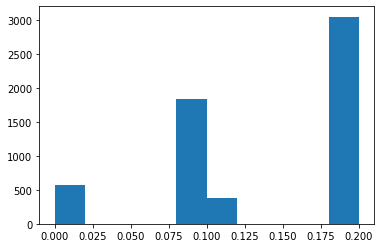

In [39]:
import matplotlib.pyplot as plt 

plt.hist(abs_diff)

In [40]:
real_age, syn_age = real['Age'], syn['Age']

ks_tests = []

for i in range(0, len(syn_age), 100):
    test = ks_test(real_age, syn_age[i:i+100])
    ks_tests.append([test[0], test[1]])

     0         1
0  0.3  0.143707
1  0.1  0.143707
2  0.3  0.143707
3  0.2  0.143707
4  0.3  0.143707
0.23200000000000004 0.14370703168499083


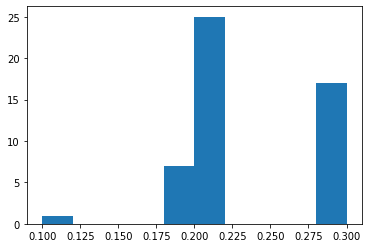

In [41]:
ks_tests_df = pd.DataFrame(ks_tests)
print(ks_tests_df.head())

plt.hist(ks_tests_df[0])

mean_D_n, mean_D_crit = ks_tests_df[0].mean(), ks_tests_df[1].mean()
print(mean_D_n, mean_D_crit)

In [33]:
accept_reject = [] 
acc = 0
rej = 0

for test in ks_tests:
    if test[0] < test[1]:
        acc+=1
        accept_reject.append('Accept')
    else:
        rej+=1
        accept_reject.append('Reject')

In [34]:
print(acc, rej)

33 17
